<a href="https://colab.research.google.com/github/Elmir22/Data-science-ML-models-/blob/main/FINAL_PROJECT_Facial_Expression_Recognition_and_Voice_Expression_Recognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
from PIL import Image


In [2]:
!wget https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/helper_functions.py

--2024-06-14 06:51:54--  https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-06-14 06:51:54 (69.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys, walk_through_dir

In [4]:
unzip_data("/content/archive (5).zip")

In [5]:
train_dir = "/content/train"
test_dir = "/content/test"

In [6]:
walk_through_dir("/content/train")

There are 7 directories and 0 images in '/content/train'.
There are 0 directories and 3995 images in '/content/train/angry'.
There are 0 directories and 7215 images in '/content/train/happy'.
There are 0 directories and 4097 images in '/content/train/fear'.
There are 0 directories and 3171 images in '/content/train/surprise'.
There are 0 directories and 4830 images in '/content/train/sad'.
There are 0 directories and 4965 images in '/content/train/neutral'.
There are 0 directories and 436 images in '/content/train/disgust'.


In [7]:
walk_through_dir("/content/test")

There are 7 directories and 0 images in '/content/test'.
There are 0 directories and 958 images in '/content/test/angry'.
There are 0 directories and 1774 images in '/content/test/happy'.
There are 0 directories and 1024 images in '/content/test/fear'.
There are 0 directories and 831 images in '/content/test/surprise'.
There are 0 directories and 1247 images in '/content/test/sad'.
There are 0 directories and 1233 images in '/content/test/neutral'.
There are 0 directories and 111 images in '/content/test/disgust'.


In [8]:
def count_files_in_subdirs(directory, set_name):
    counts = {}
    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)
        if os.path.isdir(item_path):
            counts[item] = len(os.listdir(item_path))
    df = pd.DataFrame(counts, index=[set_name])
    return df

train_count = count_files_in_subdirs(train_dir, 'train')
print(train_count)

test_count = count_files_in_subdirs(test_dir, 'test')
print(test_count)


       angry  happy  fear  surprise   sad  neutral  disgust
train   3995   7215  4097      3171  4830     4965      436
      angry  happy  fear  surprise   sad  neutral  disgust
test    958   1774  1024       831  1247     1233      111


In [55]:
train_df = train_count.transpose()
print(train_df['train'])
print("\n")
test_df = test_count.transpose()
print(test_df)

28709


          test
angry      958
happy     1774
fear      1024
surprise   831
sad       1247
neutral   1233
disgust    111


<Axes: >

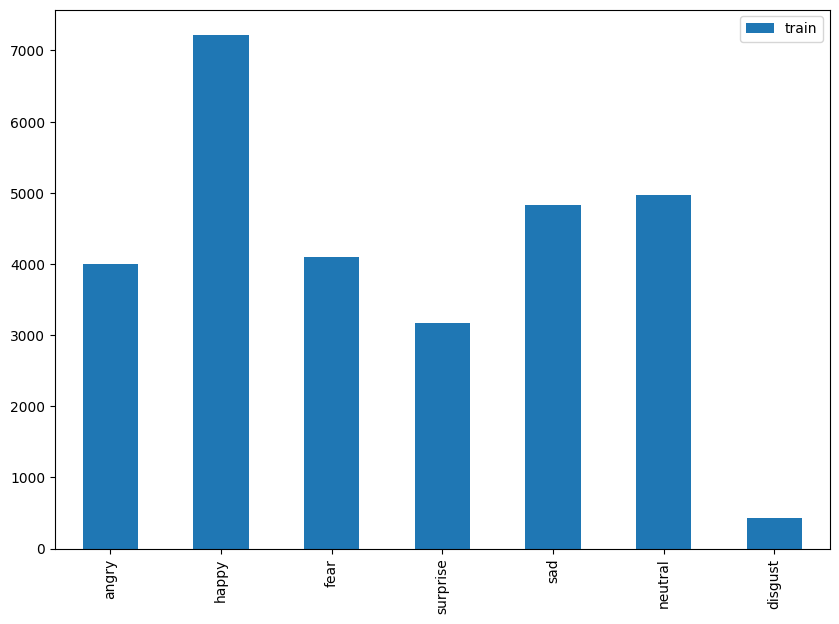

In [10]:
train_df.plot(kind='bar', figsize=(10,7))

<Axes: >

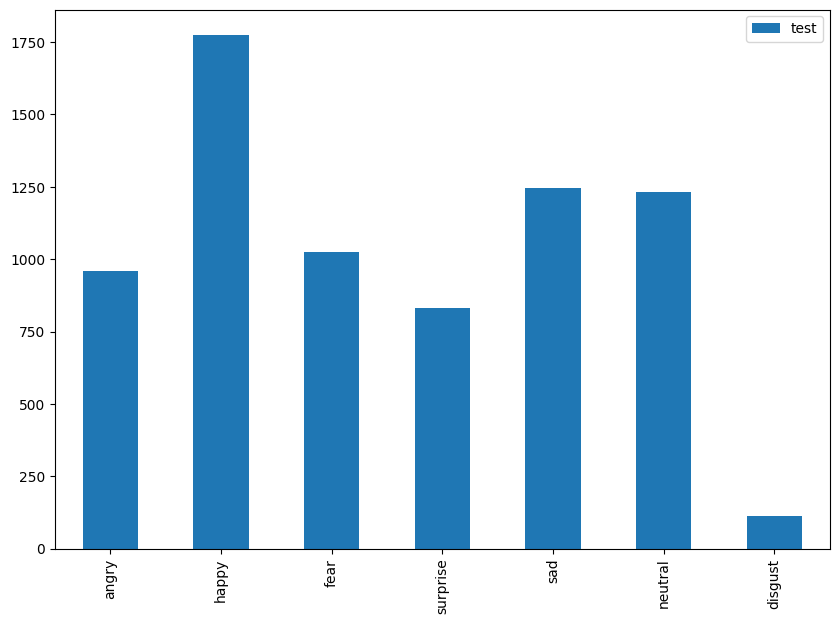

In [11]:
test_df.plot(kind='bar', figsize=(10,7))

In [12]:
train_df.reset_index(inplace=True)

In [13]:
train_df.rename(columns={'level_0': 'index'}, inplace=True)

In [14]:
train_df.rename(columns={'index': 'emotion'}, inplace=True)

In [15]:
train_df.rename(columns={'train': 'count'}, inplace=True)

In [16]:


train_df

,emotion,count
0,angry,3995
1,happy,7215
2,fear,4097
3,surprise,3171
4,sad,4830
5,neutral,4965
6,disgust,436


In [17]:
train_df['count'].sum()

28709

In [18]:
test_df.reset_index(inplace=True)

In [19]:
test_df.rename(columns={'index': 'emotion'}, inplace=True)

In [20]:
test_df.rename(columns={'test': 'count'}, inplace=True)

In [21]:
test_df['count'].sum()

7178

(48, 48)

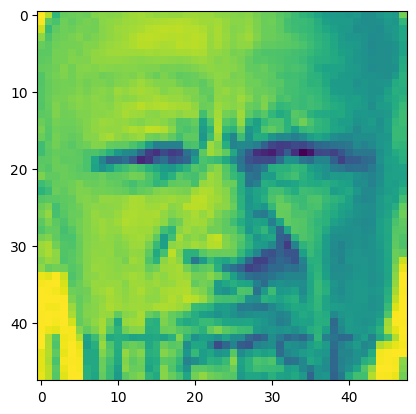

In [22]:
images = "/content/test/disgust/PrivateTest_29901781.jpg"
img = plt.imread(images)
plt.imshow(img)
img.shape

In [23]:
def view_image_shapes_pillow(directory):
    image_shapes = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(root, file)
                with Image.open(image_path) as img:
                    shape = img.size + (len(img.getbands()),)
                    image_shapes.append((image_path, shape))
                    print(f"{image_path}: {shape}")

    return image_shapes


image_shapes = view_image_shapes_pillow(train_dir)


Streaming output truncated to the last 5000 lines.
/content/train/neutral/Training_64164912.jpg: (48, 48, 1)
/content/train/neutral/Training_18393584.jpg: (48, 48, 1)
/content/train/neutral/Training_76961689.jpg: (48, 48, 1)
/content/train/neutral/Training_5955212.jpg: (48, 48, 1)
/content/train/neutral/Training_4360965.jpg: (48, 48, 1)
/content/train/neutral/Training_21011442.jpg: (48, 48, 1)
/content/train/neutral/Training_70481043.jpg: (48, 48, 1)
/content/train/neutral/Training_66334102.jpg: (48, 48, 1)
/content/train/neutral/Training_42349282.jpg: (48, 48, 1)
/content/train/neutral/Training_39512970.jpg: (48, 48, 1)
/content/train/neutral/Training_81629074.jpg: (48, 48, 1)
/content/train/neutral/Training_12782714.jpg: (48, 48, 1)
/content/train/neutral/Training_49703477.jpg: (48, 48, 1)
/content/train/neutral/Training_14370546.jpg: (48, 48, 1)
/content/train/neutral/Training_15524948.jpg: (48, 48, 1)
/content/train/neutral/Training_62129714.jpg: (48, 48, 1)
/content/train/neutral/

In [24]:
def view_image_shapes_pillow(directory):
    image_shapes = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(root, file)
                with Image.open(image_path) as img:
                    shape = img.size + (len(img.getbands()),)
                    image_shapes.append((image_path, shape))
                    print(f"{image_path}: {shape}")

    return image_shapes


image_shapes = view_image_shapes_pillow(test_dir)


Streaming output truncated to the last 5000 lines.
/content/test/happy/PrivateTest_99802225.jpg: (48, 48, 1)
/content/test/happy/PrivateTest_5514183.jpg: (48, 48, 1)
/content/test/happy/PrivateTest_58842420.jpg: (48, 48, 1)
/content/test/happy/PrivateTest_91724364.jpg: (48, 48, 1)
/content/test/happy/PrivateTest_7366737.jpg: (48, 48, 1)
/content/test/happy/PublicTest_43945833.jpg: (48, 48, 1)
/content/test/happy/PrivateTest_51176935.jpg: (48, 48, 1)
/content/test/happy/PrivateTest_97497386.jpg: (48, 48, 1)
/content/test/happy/PublicTest_12933636.jpg: (48, 48, 1)
/content/test/happy/PublicTest_71371671.jpg: (48, 48, 1)
/content/test/happy/PrivateTest_43849174.jpg: (48, 48, 1)
/content/test/happy/PublicTest_26212146.jpg: (48, 48, 1)
/content/test/happy/PrivateTest_30108404.jpg: (48, 48, 1)
/content/test/happy/PrivateTest_98023411.jpg: (48, 48, 1)
/content/test/happy/PrivateTest_17716289.jpg: (48, 48, 1)
/content/test/happy/PrivateTest_65761852.jpg: (48, 48, 1)
/content/test/happy/PublicT

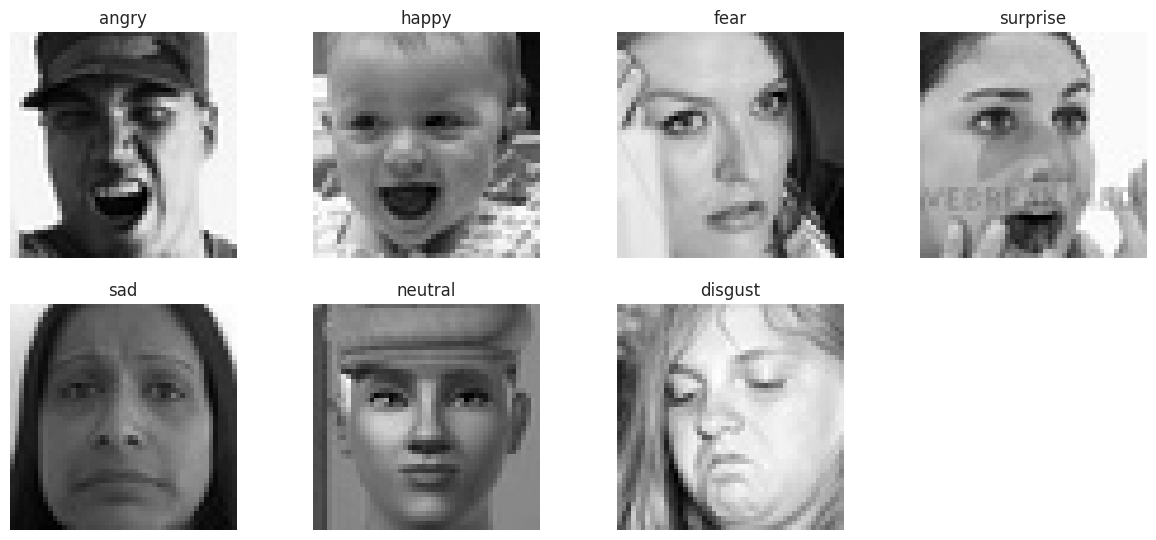

In [50]:
emotions = os.listdir(train_dir)
plt.figure(figsize=(15,10))

for i, emotion in enumerate(emotions, 1):
    folder = os.path.join(train_dir, emotion)
    img_path = os.path.join(folder, os.listdir(folder)[17])
    img = plt.imread(img_path)
    plt.subplot(3, 4, i)
    plt.imshow(img, cmap='gray')
    plt.title(emotion)
    plt.axis('off')

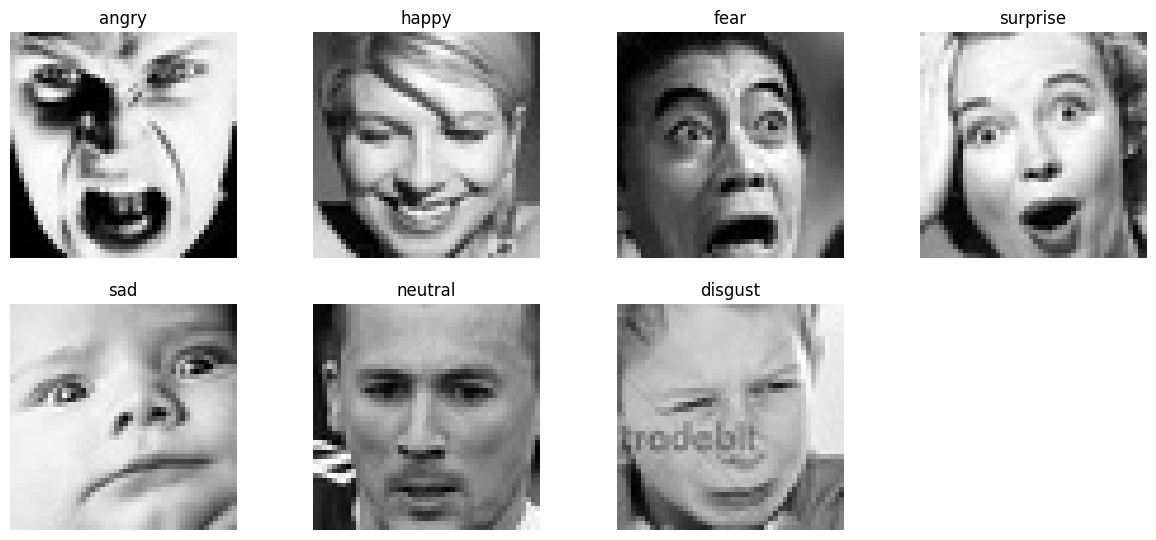

In [26]:
emotions = os.listdir(test_dir)
plt.figure(figsize=(15,10))

for i, emotion in enumerate(emotions, 1):
    folder = os.path.join(test_dir, emotion)
    img_path = os.path.join(folder, os.listdir(folder)[12])
    img = plt.imread(img_path)
    plt.subplot(3, 4, i)
    plt.imshow(img, cmap='gray')
    plt.title(emotion)
    plt.axis('off')

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_data_aug = ImageDataGenerator(rescale=1/255.,
                                    rotation_range=0.2,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.2,
                                    validation_split=0.2,
                                    horizontal_flip=True)
valid_data_aug = ImageDataGenerator(rescale=1/255.,
                                   validation_split=0.2)

In [28]:
train_data = train_data_aug.flow_from_directory(directory=train_dir,
                                                target_size=(48,48),
                                                batch_size=128,
                                                color_mode='grayscale',
                                                class_mode='categorical',
                                                subset='training')
valid_data = valid_data_aug.flow_from_directory(directory=test_dir,
                                                target_size=(48,48),
                                                batch_size=32,
                                                color_mode='grayscale',
                                                class_mode='categorical',
                                                subset='validation')

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [52]:
28709/128

224.2890625

In [53]:
len(train_data)

180

In [30]:
len(valid_data)*32

1440

In [31]:
model_0 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(48,48,1)),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [32]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 46, 46, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 44, 44, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 32)        0         
 D)                                                              
                                                        

In [36]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0002,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                metrics=['accuracy'])

In [37]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    filepath='best_model_0.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

In [38]:
history_0 = model_0.fit(train_data,
                        epochs=100,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        callbacks=[checkpoint_callback])

Epoch 1/70
180/180 [==============================] - ETA: 0s - loss: 2.1465 - accuracy: 0.1977
Epoch 1: val_accuracy improved from -inf to 0.24791, saving model to best_model_0.h5
180/180 [==============================] - 32s 141ms/step - loss: 2.1465 - accuracy: 0.1977 - val_loss: 1.9741 - val_accuracy: 0.2479
Epoch 2/70
180/180 [==============================] - ETA: 0s - loss: 1.9350 - accuracy: 0.2416
Epoch 2: val_accuracy improved from 0.24791 to 0.25209, saving model to best_model_0.h5
180/180 [==============================] - 25s 137ms/step - loss: 1.9350 - accuracy: 0.2416 - val_loss: 1.9178 - val_accuracy: 0.2521
Epoch 3/70
180/180 [==============================] - ETA: 0s - loss: 1.8353 - accuracy: 0.2769
Epoch 3: val_accuracy improved from 0.25209 to 0.34427, saving model to best_model_0.h5
180/180 [==============================] - 23s 128ms/step - loss: 1.8353 - accuracy: 0.2769 - val_loss: 1.6487 - val_accuracy: 0.3443
Epoch 4/70
180/180 [=============================

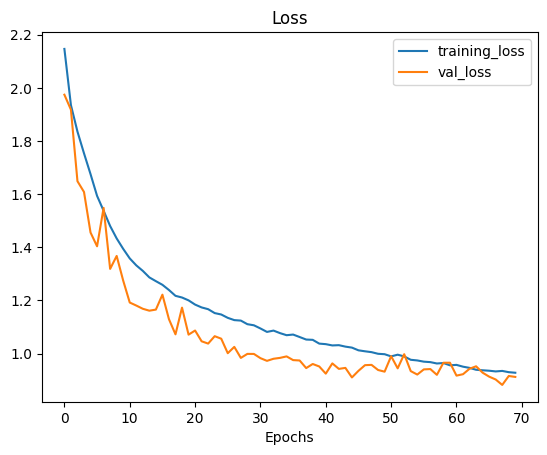

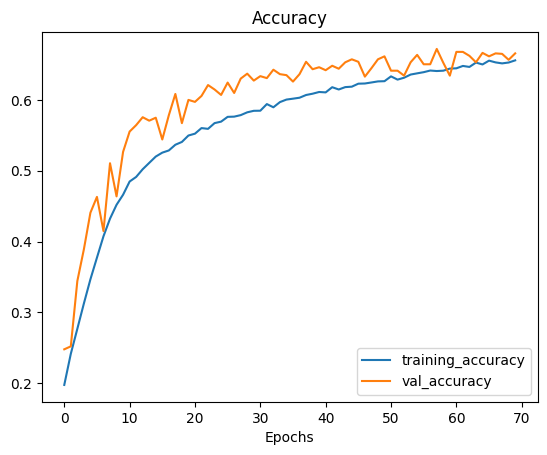

In [39]:
plot_loss_curves(history_0)

45/45 [==============================] - 1s 19ms/step


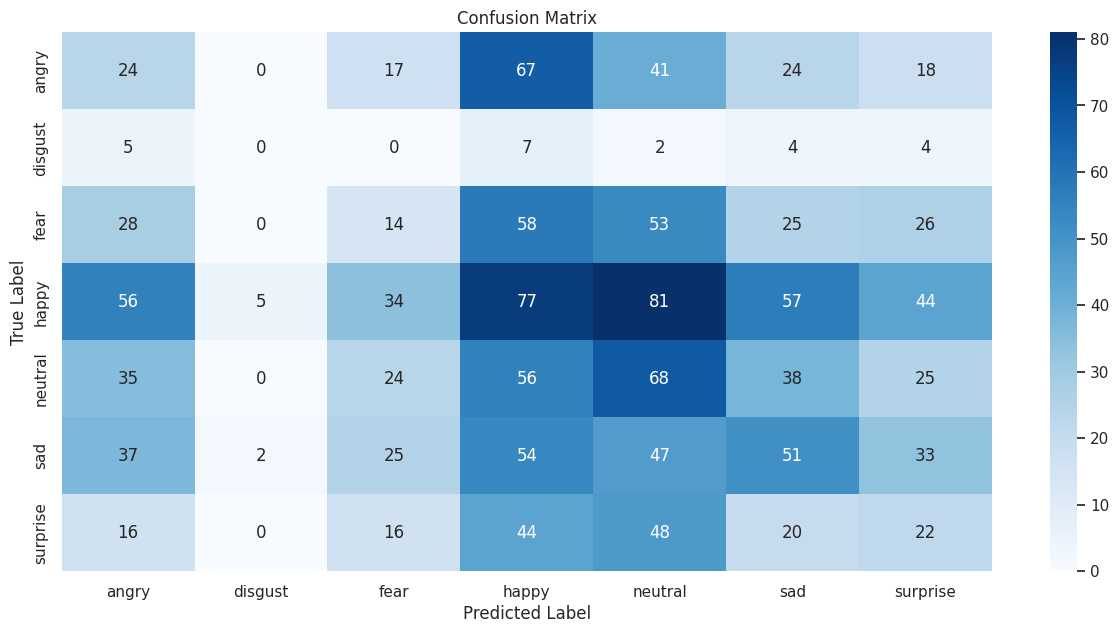

In [40]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

validation_labels = valid_data.classes
validation_pred_probs = model_0.predict(valid_data)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_data.class_indices.keys())
sns.set()
plt.figure(figsize=(15, 7))
sns.heatmap(confusion_mtx, annot=True, cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [41]:
model_0.evaluate(valid_data)

45/45 [==============================] - 1s 22ms/step - loss: 0.9122 - accuracy: 0.6655


[0.9122107028961182, 0.6655027866363525]

In [42]:
import tensorflow as tf

model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(48, 48, 1)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')
])


In [43]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_8 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_9 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                      

In [44]:
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=['accuracy'])

In [45]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    filepath='best_model_1.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

In [46]:
history_1 = model_1.fit(train_data,
                        epochs=100,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        callbacks=[checkpoint_callback])

Epoch 1/100
180/180 [==============================] - ETA: 0s - loss: 3.0368 - accuracy: 0.1501
Epoch 1: val_accuracy improved from -inf to 0.17249, saving model to best_model_1.h5
180/180 [==============================] - 50s 180ms/step - loss: 3.0368 - accuracy: 0.1501 - val_loss: 2.0752 - val_accuracy: 0.1725
Epoch 2/100
180/180 [==============================] - ETA: 0s - loss: 2.7729 - accuracy: 0.1589
Epoch 2: val_accuracy improved from 0.17249 to 0.24721, saving model to best_model_1.h5
180/180 [==============================] - 29s 159ms/step - loss: 2.7729 - accuracy: 0.1589 - val_loss: 2.0024 - val_accuracy: 0.2472
Epoch 3/100
180/180 [==============================] - ETA: 0s - loss: 2.5902 - accuracy: 0.1698
Epoch 3: val_accuracy did not improve from 0.24721
180/180 [==============================] - 29s 159ms/step - loss: 2.5902 - accuracy: 0.1698 - val_loss: 1.9800 - val_accuracy: 0.2381
Epoch 4/100
180/180 [==============================] - ETA: 0s - loss: 2.4516 - acc

In [49]:
model_1.evaluate(valid_data)

45/45 [==============================] - 1s 16ms/step - loss: 0.9103 - accuracy: 0.6676


[0.9103482365608215, 0.667597770690918]

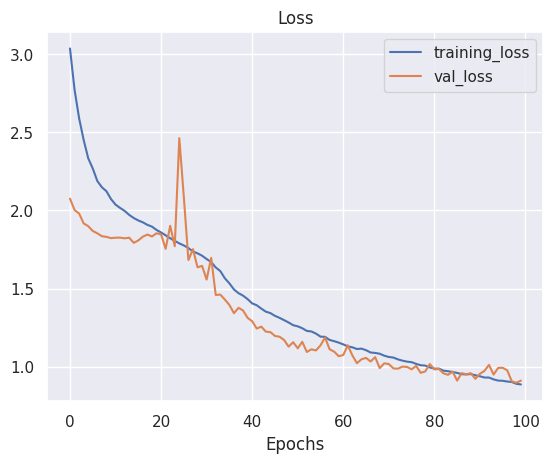

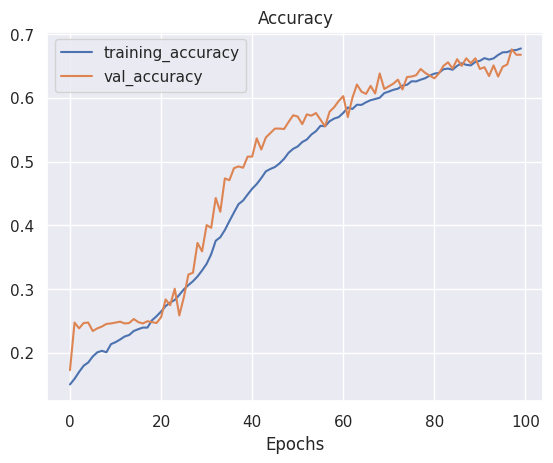

In [47]:
plot_loss_curves(history_1)

45/45 [==============================] - 1s 15ms/step


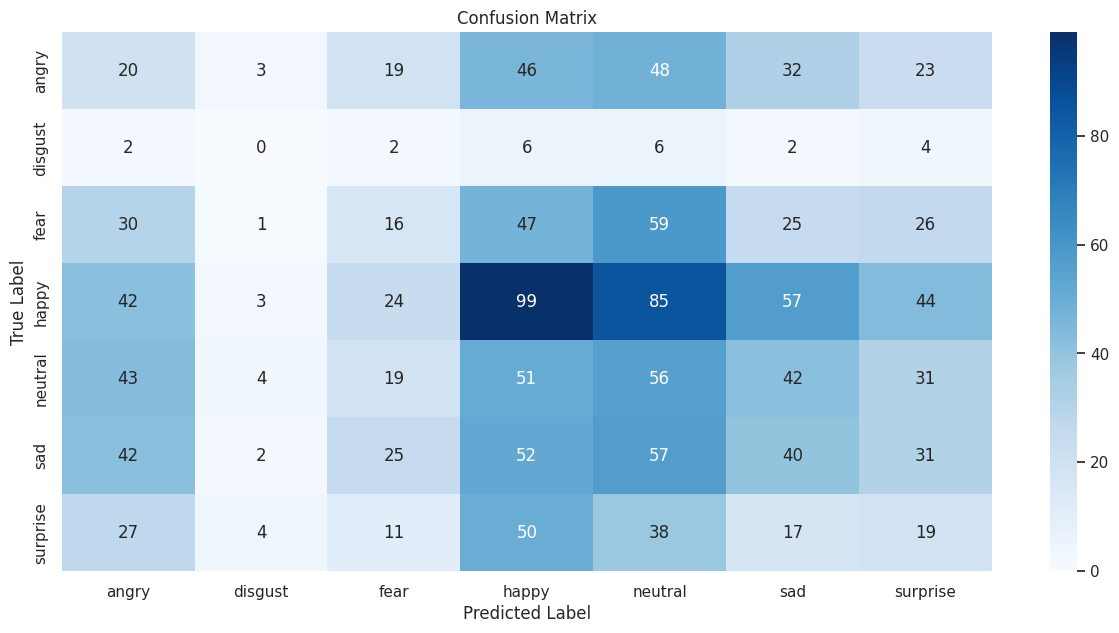

In [48]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

validation_labels = valid_data.classes
validation_pred_probs = model_1.predict(valid_data)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_data.class_indices.keys())
sns.set()
plt.figure(figsize=(15, 7))
sns.heatmap(confusion_mtx, annot=True, cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()